# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from weather_api import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#!pip install citipy had to install citipy for use
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def getweather(city , units = "standard"):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    query_url = base_url + 'appid=' + weather_api_key + '&units=' + units + '&q=' + city
    return requests.get(query_url).json()

In [4]:
# testing for an individual city to see what the output is like
getweather('atlanta',units='imperial')

{'coord': {'lon': -84.39, 'lat': 33.75},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 63.19,
  'feels_like': 57.11,
  'temp_min': 62.6,
  'temp_max': 64.99,
  'pressure': 1021,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 300},
 'clouds': {'all': 75},
 'dt': 1602868547,
 'sys': {'type': 1,
  'id': 4155,
  'country': 'US',
  'sunrise': 1602848606,
  'sunset': 1602889333},
 'timezone': -14400,
 'id': 4180439,
 'name': 'Atlanta',
 'cod': 200}

In [45]:
#create empty lists to append to
city_name = []
city_lat = []
city_lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [46]:
print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    print(f'Processing Record 1 of Set 1 | {city}')
    try:
        weather_data = getweather(city,units='imperial')
        city_name.append(weather_data['name'])
        city_lat.append(weather_data['coord']['lat'])
        city_lng.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
    except:
        print(f'City not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dharchula
Processing Record 1 of Set 1 | ushuaia
Processing Record 1 of Set 1 | punta arenas
Processing Record 1 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 1 of Set 1 | albany
Processing Record 1 of Set 1 | bethel
Processing Record 1 of Set 1 | busselton
Processing Record 1 of Set 1 | puerto ayora
Processing Record 1 of Set 1 | touho
Processing Record 1 of Set 1 | saint-philippe
Processing Record 1 of Set 1 | cherskiy
Processing Record 1 of Set 1 | kargil
Processing Record 1 of Set 1 | yueyang
Processing Record 1 of Set 1 | mataura
Processing Record 1 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 1 of Set 1 | grand baie
Processing Record 1 of Set 1 | cape town
Processing Record 1 of Set 1 | laguna
Processing Record 1 of Set 1 | kudahuvadhoo
Processing Record 1 of Set 1 | dingle
Processing Record 1 of Set 1 | tamiahua
Processing Record 1 of Set 1 | esper

City not found. Skipping...
Processing Record 1 of Set 1 | waipawa
Processing Record 1 of Set 1 | barawe
City not found. Skipping...
Processing Record 1 of Set 1 | necochea
Processing Record 1 of Set 1 | kumluca
Processing Record 1 of Set 1 | katwa
Processing Record 1 of Set 1 | batagay-alyta
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 1 | taltal
Processing Record 1 of Set 1 | estelle
Processing Record 1 of Set 1 | kaitangata
Processing Record 1 of Set 1 | novopskov
Processing Record 1 of Set 1 | faanui
Processing Record 1 of Set 1 | peravurani
Processing Record 1 of Set 1 | cayenne
Processing Record 1 of Set 1 | mocambique
City not found. Skipping...
Processing Record 1 of Set 1 | weyburn
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 1 of Set 1 | sao filipe
Processing Record 1 of Set 1 | jijiang
Processing Record 1 of Set 1 | east london
Processing Record 1 of Set 1 | kuche
City not found. Skipping...
Processing Rec

Processing Record 1 of Set 1 | thayetmyo
Processing Record 1 of Set 1 | male
Processing Record 1 of Set 1 | anadyr
Processing Record 1 of Set 1 | haizhou
Processing Record 1 of Set 1 | vyshhorod
Processing Record 1 of Set 1 | amahai
Processing Record 1 of Set 1 | pingliang
Processing Record 1 of Set 1 | sao jose da coroa grande
Processing Record 1 of Set 1 | korla
Processing Record 1 of Set 1 | bengkulu
Processing Record 1 of Set 1 | husavik
Processing Record 1 of Set 1 | kangaatsiaq
Processing Record 1 of Set 1 | colonial heights
Processing Record 1 of Set 1 | diamantina
Processing Record 1 of Set 1 | castro
Processing Record 1 of Set 1 | kedougou
Processing Record 1 of Set 1 | lom
Processing Record 1 of Set 1 | mayumba
Processing Record 1 of Set 1 | ginir
Processing Record 1 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 1 of Set 1 | ho
City not found. Skipping...
Processing Record 1 of Set 1 | lorengau
Processing Record 1 of Set 1 | umzimvubu
City not found. Ski

Processing Record 1 of Set 1 | flagstaff
Processing Record 1 of Set 1 | west wendover
Processing Record 1 of Set 1 | tignere
Processing Record 1 of Set 1 | shingu
Processing Record 1 of Set 1 | zlobin
Processing Record 1 of Set 1 | padang
Processing Record 1 of Set 1 | nemuro
Processing Record 1 of Set 1 | visnes
Processing Record 1 of Set 1 | adana
Processing Record 1 of Set 1 | luderitz
Processing Record 1 of Set 1 | jiddah
City not found. Skipping...
Processing Record 1 of Set 1 | hope
Processing Record 1 of Set 1 | kahului
Processing Record 1 of Set 1 | eyrarbakki
Processing Record 1 of Set 1 | mount isa
Processing Record 1 of Set 1 | luanda
Processing Record 1 of Set 1 | pizhanka
Processing Record 1 of Set 1 | bridlington
Processing Record 1 of Set 1 | villazon
Processing Record 1 of Set 1 | deputatskiy
Processing Record 1 of Set 1 | utiroa
City not found. Skipping...
Processing Record 1 of Set 1 | lovozero
Processing Record 1 of Set 1 | haapu
City not found. Skipping...
Processin

In [47]:
len(city_name)

544

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
#create dataframe using our lists
weather_df = pd.DataFrame({'City':city_name,
                          'Lat':city_lat,
                          'Lng':city_lng,
                          'Max Temp':max_temp,
                          'Humidity':humidity,
                          'Cloudiness':cloudiness,
                          'Wind Speed':wind_speed,
                          'Country':country,
                          'Datetime':date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Dhārchula,29.85,80.53,60.67,42,0,4.14,IN,1602873510
1,Ushuaia,-54.80,-68.30,46.40,61,75,21.92,AR,1602873493
2,Punta Arenas,-53.15,-70.92,41.00,86,90,11.41,CL,1602873367
3,Albany,42.60,-73.97,50.00,77,100,3.87,US,1602873511
4,Bethel,41.37,-73.41,52.00,93,90,6.93,US,1602873511


In [50]:
#export the dataframe to a csv
weather_df.to_csv(output_data_file, index = False)

In [51]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Datetime
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.642151,20.350919,62.656563,70.738971,52.113971,8.280129,1.602874e+09
std,32.879056,89.150966,20.121286,22.280686,39.454310,5.649765,6.511444e+01
min,-54.800000,-175.200000,-2.070000,1.000000,0.000000,0.310000,1.602873e+09
25%,-8.855000,-58.935000,48.200000,60.750000,8.000000,4.380000,1.602874e+09
50%,21.355000,24.765000,66.200000,76.000000,55.000000,6.930000,1.602874e+09
75%,45.407500,100.342500,78.800000,88.000000,90.000000,11.410000,1.602874e+09
max,78.220000,179.320000,101.590000,100.000000,100.000000,34.610000,1.602874e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

The max humidity is already 100%. But I'll attempt this exercise with 90% humidity and just comment it out.

In [30]:
#  Get the indices of cities that have humidity over 100%.

# indices = weather_df.loc[weather_df['Humidity']>90].index


Int64Index([  4,   9,  11,  12,  19,  25,  51,  61,  63,  64,  76,  79,  83,
             89,  90,  97, 101, 102, 118, 122, 132, 143, 149, 159, 182, 199,
            202, 206, 218, 221, 222, 249, 251, 259, 264, 265, 278, 282, 283,
            288, 291, 293, 295, 296, 299, 301, 304, 312, 317, 326, 327, 340,
            342, 343, 350, 351, 355, 356, 363, 367, 369, 371, 376, 384, 389,
            415, 419, 430, 434, 442, 448, 450, 457, 469, 477, 483, 495, 499,
            507, 508, 510, 512, 536, 537, 540],
           dtype='int64')

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# clean_city_data = weather_df.drop(indices)
# clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,4.590000e+02
mean,15.227211,13.702048,292.304423,65.708061,47.520697,3.827930,1.602869e+09
std,31.484629,86.670924,10.522393,20.471670,37.944701,2.463765,2.183724e+02
min,-54.800000,-169.920000,259.260000,8.000000,0.000000,0.040000,1.602868e+09
25%,-9.605000,-63.315000,284.480000,54.000000,6.000000,2.100000,1.602869e+09
50%,17.020000,14.370000,294.820000,72.000000,40.000000,3.130000,1.602869e+09
75%,40.220000,82.840000,300.150000,81.000000,89.500000,5.100000,1.602869e+09
max,78.220000,179.320000,313.840000,90.000000,100.000000,14.310000,1.602869e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Seeing as how we're going to be plotting latitude vs other variables... might as well try to package the whole thing into a function

In [69]:
def lat_scatter(y_axis,y_label):
    plt.scatter(weather_df['Lat'],weather_df[y_axis],marker='.')
    plt.title(f'Latitude vs {y_label} ({time.strftime("%m/%d/%y")})') # apparently you can also use datetime but might need to import it? not too sure here
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.grid(True)
    # save the plot as a png in the output data folder
    plt.savefig(f'output_data/Latitude vs {y_label}.png')
    plt.show()
    

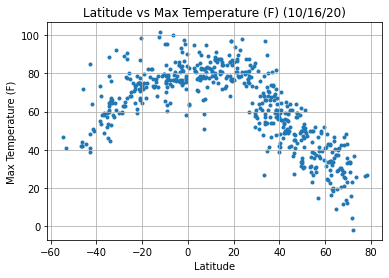

In [87]:
lat_scatter('Max Temp','Max Temperature (F)')

I guess we can consider latitude as a means of measuring distance from the equator. The above scatter plot seems to suggest that the maximum temperature seems to drop the further a city is from an equator and vice versa. 

## Latitude vs. Humidity Plot

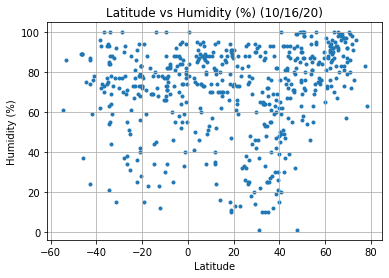

In [71]:
lat_scatter('Humidity','Humidity (%)')

Just looking at the scatter plot - there does not seem to be a distinct correlation. It is interesting to note that there seem to be a lot more cities with higher humidity than lower. Maybe that can be explained with further study.

## Latitude vs. Cloudiness Plot

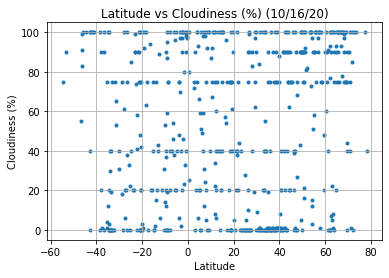

In [72]:
lat_scatter('Cloudiness','Cloudiness (%)')

Just looking at the scatter plot - there does not seem to be a distinct correlation between latitude and cloudiness. It is however, worth noting that across many different latitudes, multiple cities report the same cloudiness. Perhaps the techniques or equipment used to measure cloudiness are very similar?

## Latitude vs. Wind Speed Plot

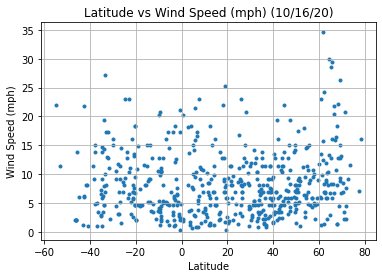

In [73]:
lat_scatter('Wind Speed','Wind Speed (mph)')

Again, there doesn't seem to be a distinct correlation between wind speed and latitude. I think, for this sort of study, it would be beneficial to expand the scope of the data - then we would be able to say with more certainty whether or not they truly seem to be independent. At the end of the day it is always worthwhile to see waht other data elements we could leverage to achieve a more meaningful analysis.

## Linear Regression

In [74]:
weather_df_northern = weather_df.loc[weather_df['Lat']>=0]
weather_df_southern = weather_df.loc[weather_df['Lat']<0] 

In [77]:
weather_df_northern['Lat'].describe()

count    365.000000
mean      37.812986
std       20.101303
min        0.500000
25%       20.890000
50%       38.470000
75%       54.350000
max       78.220000
Name: Lat, dtype: float64

In [76]:
weather_df_southern['Lat'].describe()

count    179.000000
mean     -20.449218
std       13.458326
min      -54.800000
25%      -32.400000
50%      -20.410000
75%       -8.970000
max       -0.410000
Name: Lat, dtype: float64

In [86]:
#create a function ... we can use the one from above, but I would like to save the figure after regressing
#would also be ideal if I could specify the dataframe as one of the params unlike the first time
def lat_reg(y_axis,y_label,hemisphere='N'):
    if hemisphere=='N':
        df = weather_df_northern
    elif hemisphere=='S':
        df = weather_df_southern        
        
    (slope,intercept,rvalue,pvalue,stderr) = linregress(df['Lat'],df[y_axis])
    corr = round(rvalue,2)
    y_values = df['Lat'] * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    print(f'The correlation is {corr}')

    plt.scatter(df['Lat'],df[y_axis],marker='.')
    plt.plot(df['Lat'],y_values,color='red')
    plt.annotate(line_eq,(5,5),color='red')
    # I didn't take into account that the line equation would not show up in the graphs for the southern hemisphere...
    # If I could go back without redoing the whole thing, I would create an if function on this plt.annotate part similar to the one above
    plt.title(f'Latitude vs {y_label} ({time.strftime("%m/%d/%y")})') # apparently you can also use datetime but might need to import it? not too sure here
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.grid(True)
    # save the plot as a png in the output data folder
    plt.savefig(f'output_data/Latitude vs {y_label}_{hemisphere}.png')
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation is -0.87


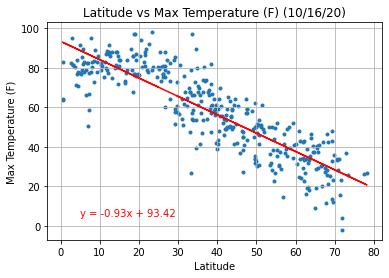

In [88]:
lat_reg('Max Temp','Max Temperature (F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation is 0.69


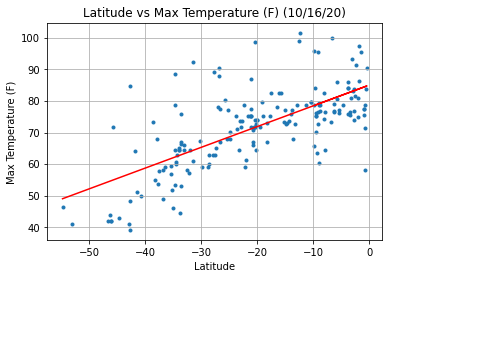

In [89]:
lat_reg('Max Temp','Max Temperature (F)','S')

In each plot, the correlation is fairly high, supporting our guess from above that the closer a city is to the equator, the higher its temperature will be. Interestingly enough, for our sample, a linear regression line fits quite well.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation is 0.25


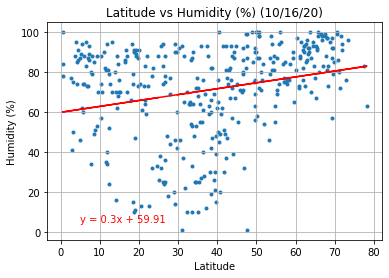

In [90]:
lat_reg('Humidity','Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation is -0.05


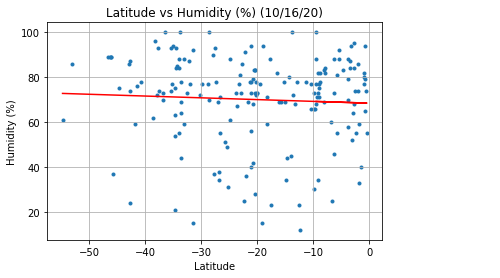

In [91]:
lat_reg('Humidity','Humidity (%)','S')

These plots strenghten our argument of there being no real correlation between humidity and latitude. Then again... there may be some sort of odd function that captures the distribution that we do not yet know of. (Keep in mind we're only doing a simple linear regression)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation is 0.19


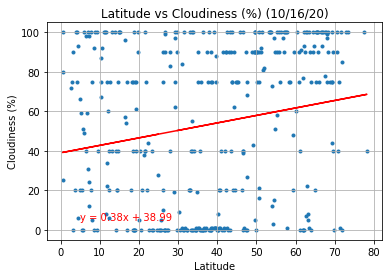

In [92]:
lat_reg('Cloudiness','Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation is 0.06


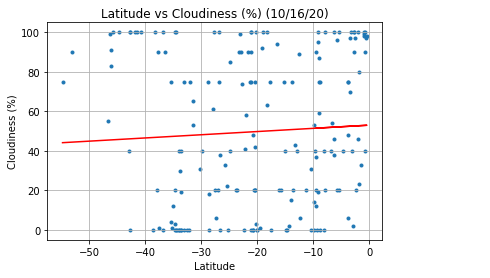

In [93]:
lat_reg('Cloudiness','Cloudiness (%)','S')

Once again, it seems that there is almost no linear relationship between latitude and cloudiness. These should be pretty obvious at a glance of the first scatter plots we did.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation is 0.16


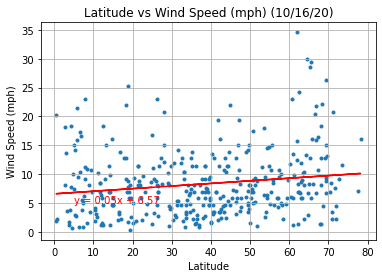

In [94]:
lat_reg('Wind Speed','Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation is -0.11


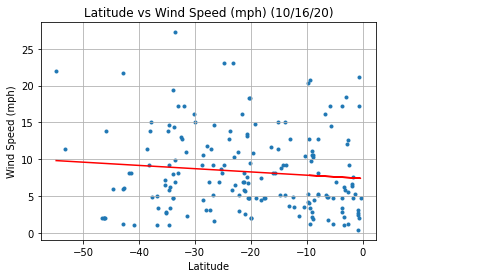

In [95]:
lat_reg('Wind Speed','Wind Speed (mph)','S')

Interestingly enough, these are almost just as uncorellated as the previous two sets of comparisons. At a glace, it is not intuitively obvious since the points appear to be much more densely packed together.